## Import python libraies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans

# Read the Data
#### load the CSV into a data frame
##### (Csv files contains plain tsxt and is a well know format that can be read that can be ready by evrryone including pandas.)

In [4]:
data=pd.read_csv("Wholesale customers data.csv") 
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.shape # shape is a tuple that give dimensions of the array

(440, 8)

#### Mean is average value of data

In [4]:
mean= np.mean(data)  # Mean value of all feature vectors
mean

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

### Standard deviation is a measure of how dispersed the data is in relation to the mean and it is standard form of variance.
#### Low standard deviation means data are clusterd around the mean ,and high standard deviation indicates data are more spred out.


In [5]:
std = np.std(data)   # Standard deviation of all feature vectors
std

Channel                 0.467519
Region                  0.773392
Fresh               12632.948725
Milk                 7371.985612
Grocery              9492.357638
Frozen               4849.153520
Detergents_Paper     4762.433350
Delicassen           2816.899449
dtype: float64

In [6]:
data.describe()  #give desripition of data in the Data frame

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Anova Testing
### The One-way ANOVA compare the means between the groups you are interested in and determines whether any of those means are Statistically significantly different from each other.Specifically, it test the null hypothesis:
### If , however,the one way ANNOVA return a statistically significant result,we accept the alternative hypothesis(H1),which is that there are at least two group means that are statistically significantly different from each other.
#### H0 = there is no difference b/w the mean values H1: at least one difference b/w the mean value.
##### Steps for calculating one way ANNOVA.
##### Step1: State your Null and Alternate Hypothesis
##### Step2: Calculate the degree of freedom (df)
##### Step3: Calculate Sum of Square Deviation from the Mean( SS)
##### Step4: Calculate Mean Square
##### Step5: Calculate F-Statistics
##### Step6: Compare your F value
##### State7: State the conclusion
###### If Calculated value F is < Tabulated F value then accept the NULL hypothesis 
###### If Calculated value F is > Tabulated F value then Reject the NULL hypothesis and accept H1


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
data=pd.read_csv("Wholesale customers data.csv") 
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
DF=data.groupby("Region").groups
DF

{1: [196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272], 2: [293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339], 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,

In [10]:
z=data["Region"]
z.head()

0    3
1    3
2    3
3    3
4    3
Name: Region, dtype: int64

In [11]:
R=data.loc[:,["Channel","Milk","Fresh","Grocery","Frozen","Detergents_Paper","Delicassen"]]
R

,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,9656,12669,7561,214,2674,1338
1,2,9810,7057,9568,1762,3293,1776
2,2,8808,6353,7684,2405,3516,7844
3,1,1196,13265,4221,6404,507,1788
4,2,5410,22615,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,12051,29703,16027,13135,182,2204
436,1,1431,39228,764,4510,93,2346
437,2,15488,14531,30243,437,14841,1867
438,1,1981,10290,2232,1038,168,2125


In [12]:
model=ols('z ~ R',DF).fit()
anova=sm.stats.anova_lm(model,typ=2)
anova

,sum_sq,df,F,PR(>F)
R,3.779802,7.0,0.89926,0.506841
Residual,259.399743,432.0,NaN,NaN


#### Here we find out the F values > Tabulated F value 
#### so  we reject the Null hypothesis and accept H1 = difference b/w mean values

# Scaling
### Feature Scaling is a technique to standardlize the data in a fixed range 
#### It is performed during the data pre-processing.
##### We have two method for Scaling 1.min-max-normalization 2.Standardization
##### X=Xi-min(X)/max(x)-min(X) { Min-Max-Normalization}
##### X=Xi-Xmean/sd  {Standardization}

In [13]:
from sklearn import preprocessing
Standardisation =preprocessing.StandardScaler()
data[["Region"]] = Standardisation.fit_transform(data[["Region"]])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.590668,12669,9656,7561,214,2674,1338
1,2,0.590668,7057,9810,9568,1762,3293,1776
2,2,0.590668,6353,8808,7684,2405,3516,7844
3,1,0.590668,13265,1196,4221,6404,507,1788
4,2,0.590668,22615,5410,7198,3915,1777,5185


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [15]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0,1))       #direct scaling and update in csv file   
data[["Region"]]= min_max_scaler.fit_transform(data[["Region"]])
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,1.0,12669,9656,7561,214,2674,1338
1,2,1.0,7057,9810,9568,1762,3293,1776
2,2,1.0,6353,8808,7684,2405,3516,7844
3,1,1.0,13265,1196,4221,6404,507,1788
4,2,1.0,22615,5410,7198,3915,1777,5185


In [16]:
data["Region"].unique()  #give unique values of an array .

array([1. , 0. , 0.5])

In [17]:
data["Channel"].unique()

array([2, 1], dtype=int64)

# Visulization
#### Here we represent the information and data in graphs.

<AxesSubplot:>

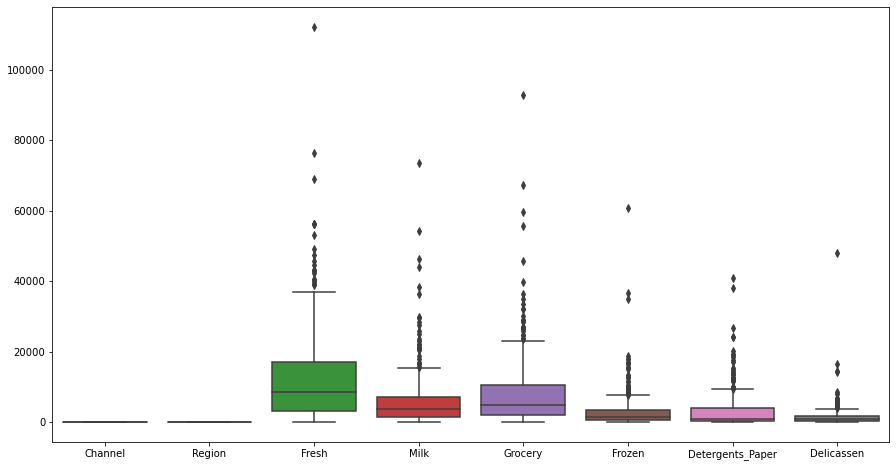

In [18]:
plt.figure(figsize = (15,8))
sns.boxplot(data=data.iloc[:,:])  # A boxplot is a graph indicates the how values in the data are spred out.

<AxesSubplot:xlabel='Region', ylabel='Milk'>

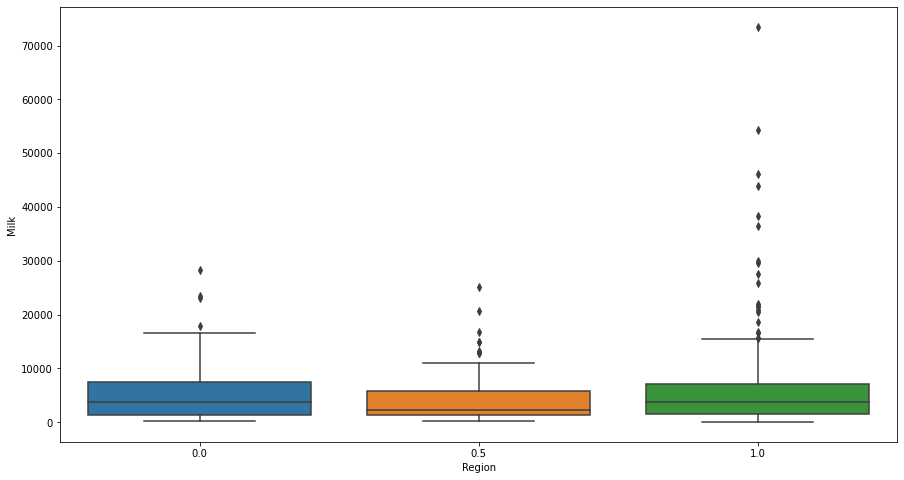

In [19]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Milk"])

<AxesSubplot:xlabel='Region', ylabel='Milk'>

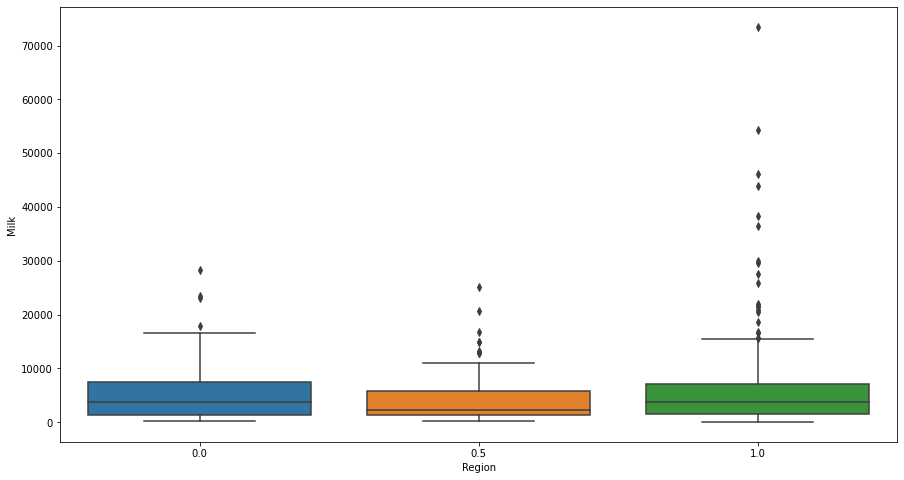

In [20]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Milk"])

<AxesSubplot:xlabel='Region', ylabel='Fresh'>

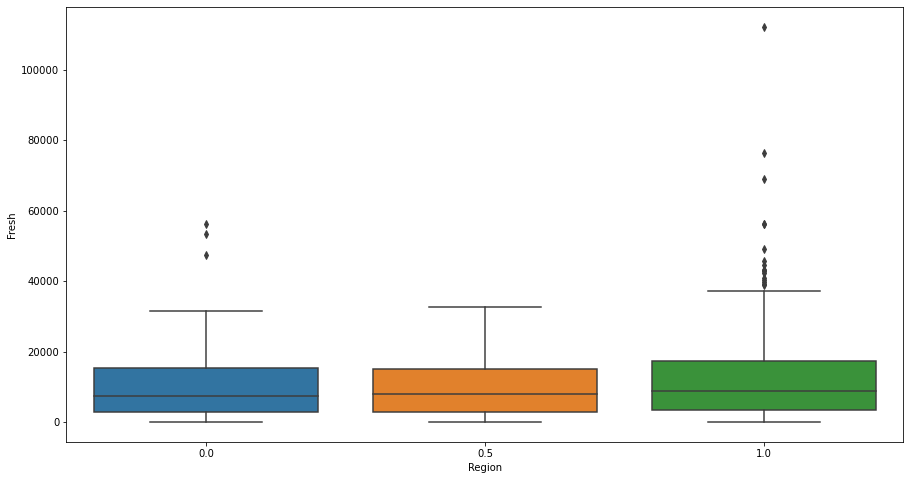

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Fresh"])

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

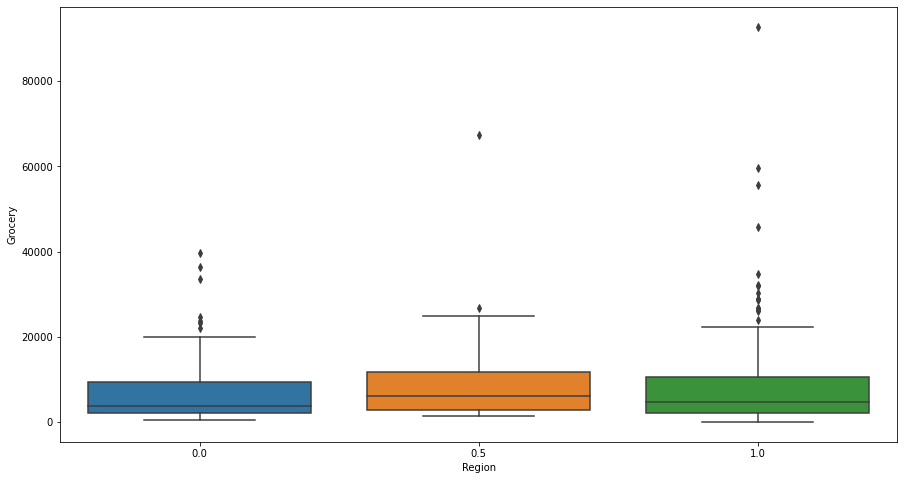

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Grocery"])

<AxesSubplot:xlabel='Region', ylabel='Frozen'>

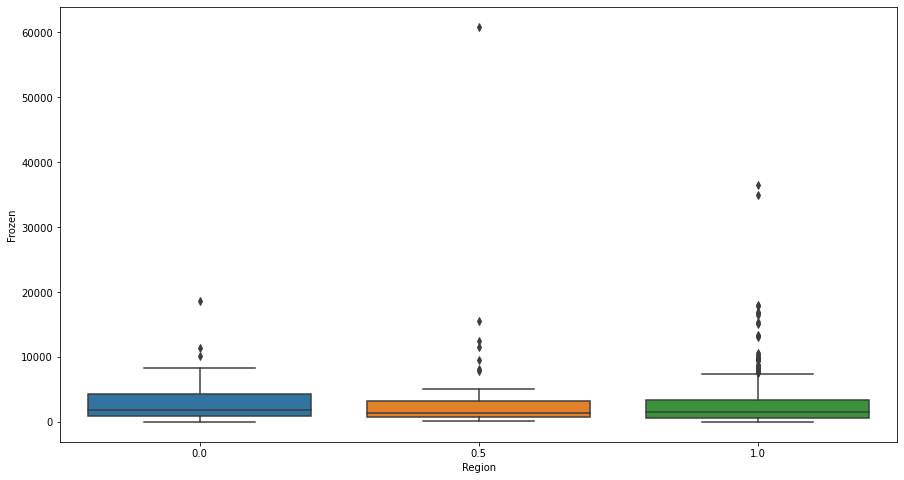

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Frozen"])

<AxesSubplot:xlabel='Region', ylabel='Delicassen'>

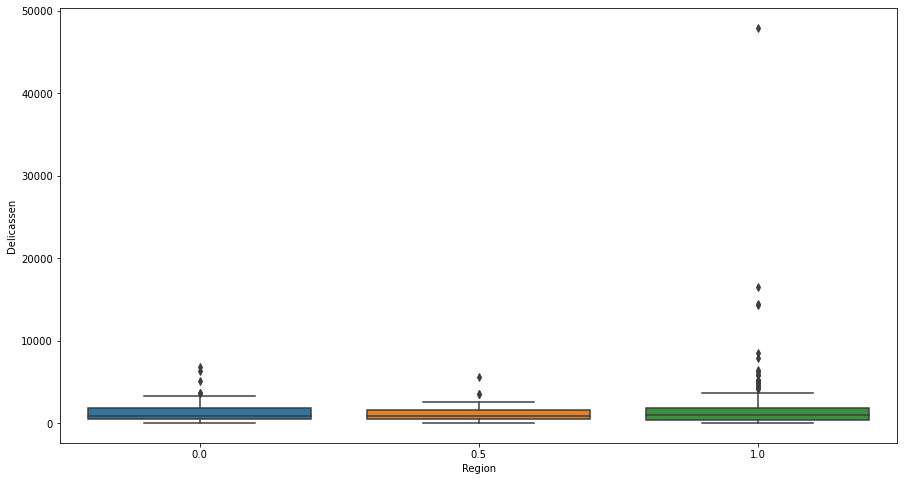

In [24]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Delicassen"])

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

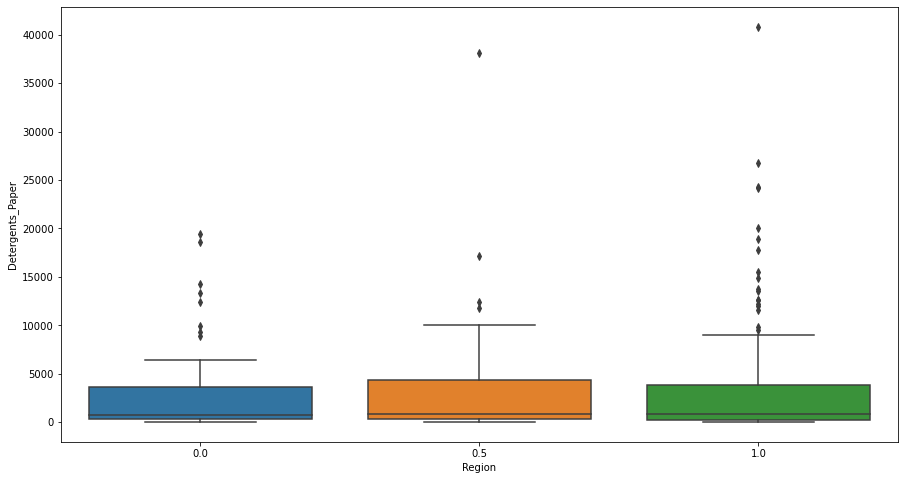

In [25]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Detergents_Paper"])

<AxesSubplot:xlabel='Region', ylabel='Channel'>

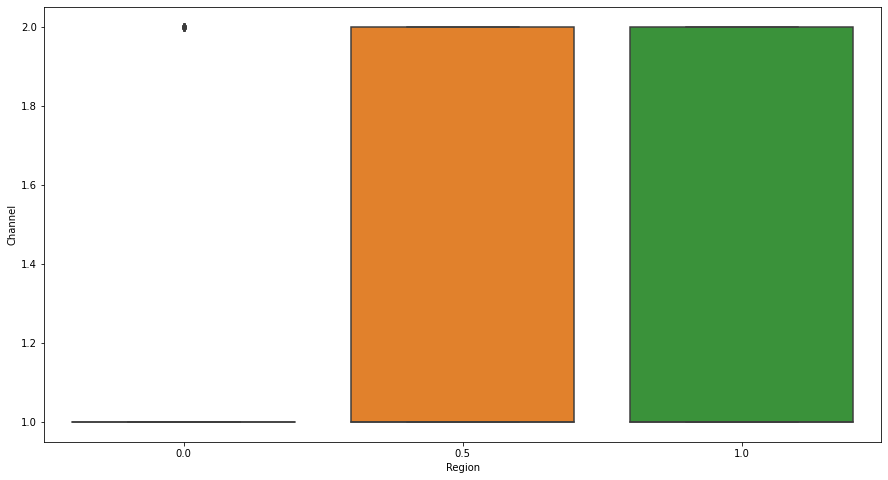

In [26]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Region"],y=data["Channel"])

<AxesSubplot:xlabel='Channel', ylabel='Region'>

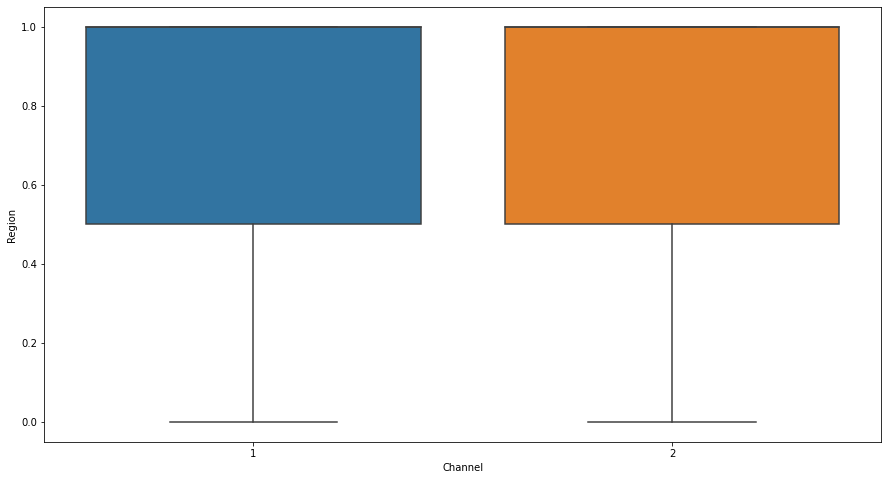

In [27]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Region"])

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

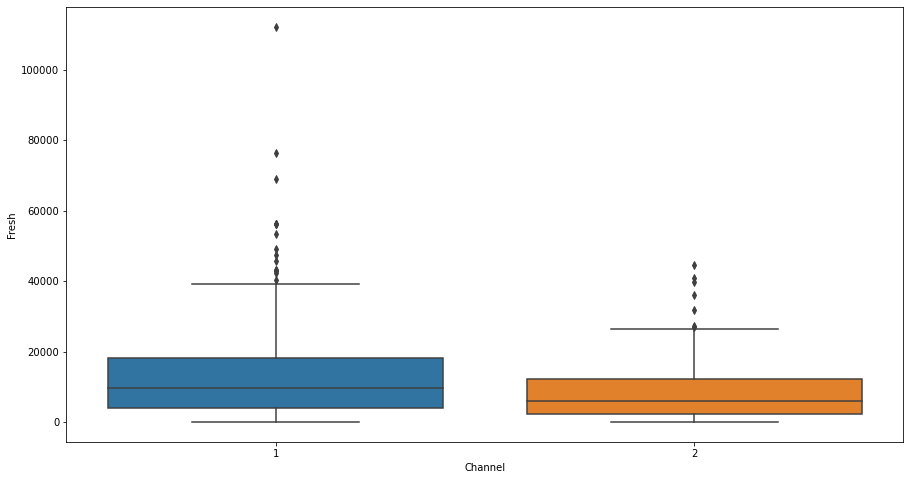

In [28]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Fresh"])

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

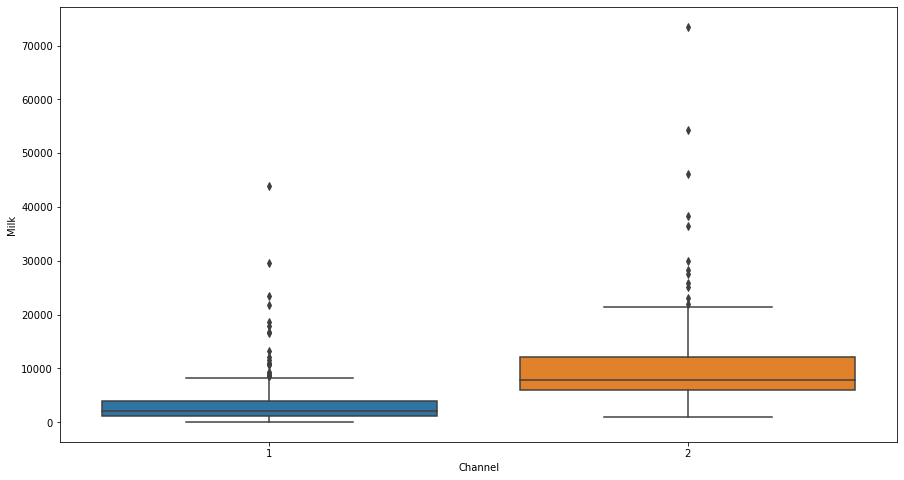

In [29]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Milk"])

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

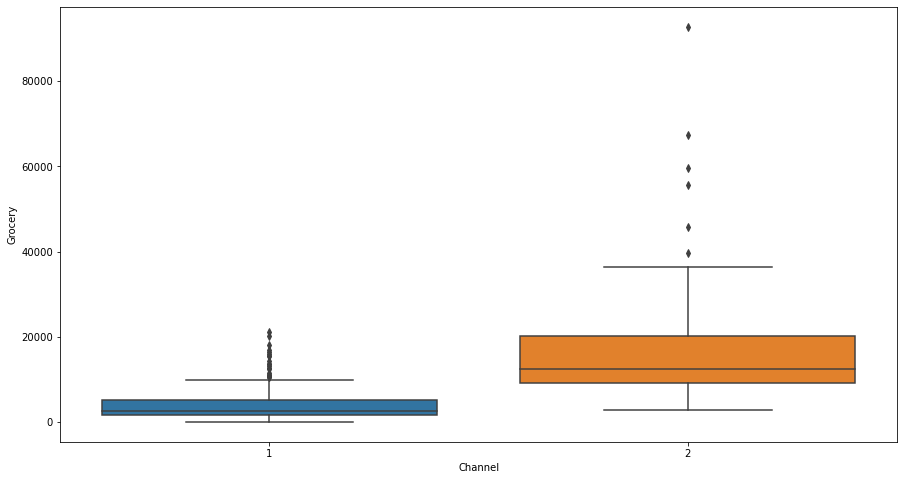

In [30]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Grocery"])

<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

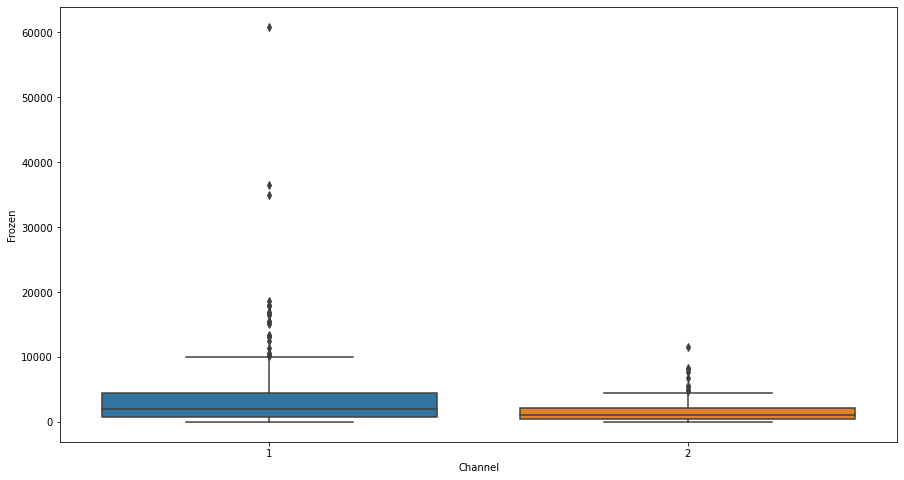

In [31]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Frozen"])

<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

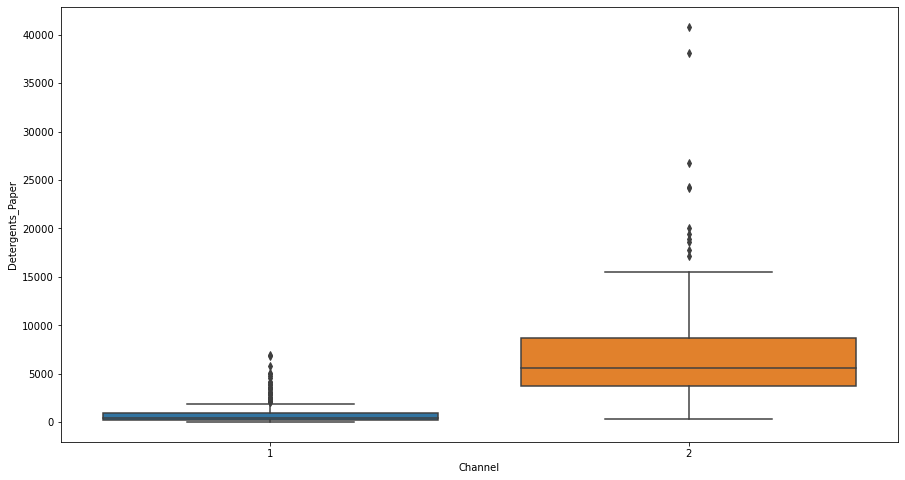

In [32]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Detergents_Paper"])

<AxesSubplot:xlabel='Channel', ylabel='Delicassen'>

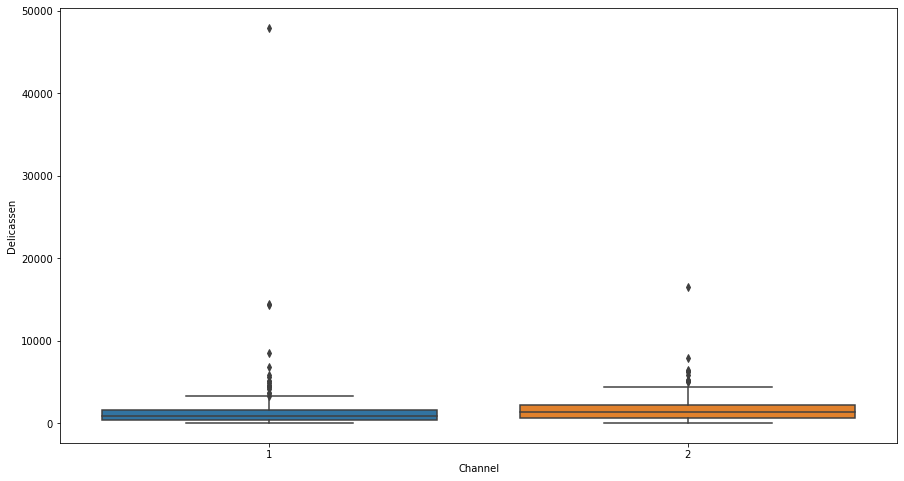

In [33]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data["Channel"],y=data["Delicassen"])

<AxesSubplot:xlabel='Region', ylabel='count'>

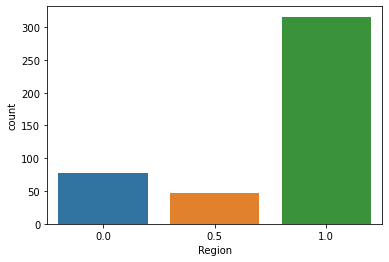

In [34]:
sns.countplot(x="Region",data=data) #countplot is a bar graph it simply show no of occurences of an item on a certain type category

<AxesSubplot:xlabel='Channel', ylabel='count'>

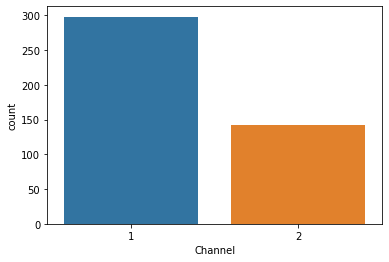

In [35]:
sns.countplot(x="Channel",data=data)

In [36]:
data.corr()  # it is use for pairwise correlation of all columns in dataframe.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

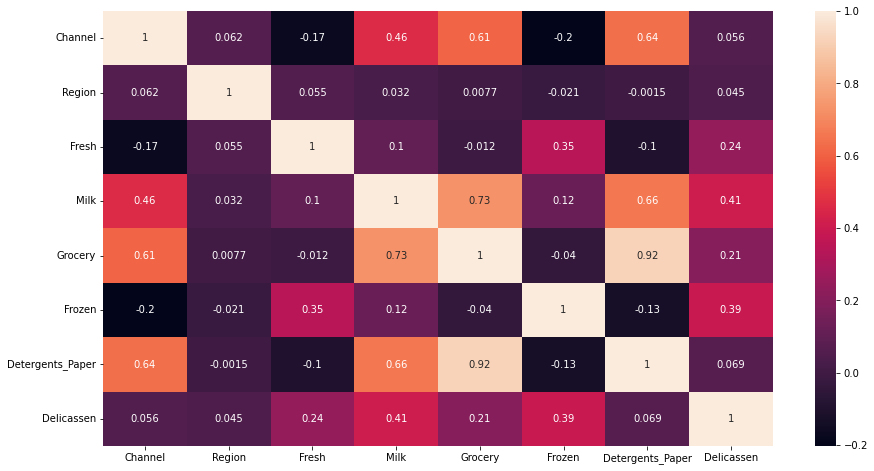

In [37]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot=True)   #correlation by using heatmap

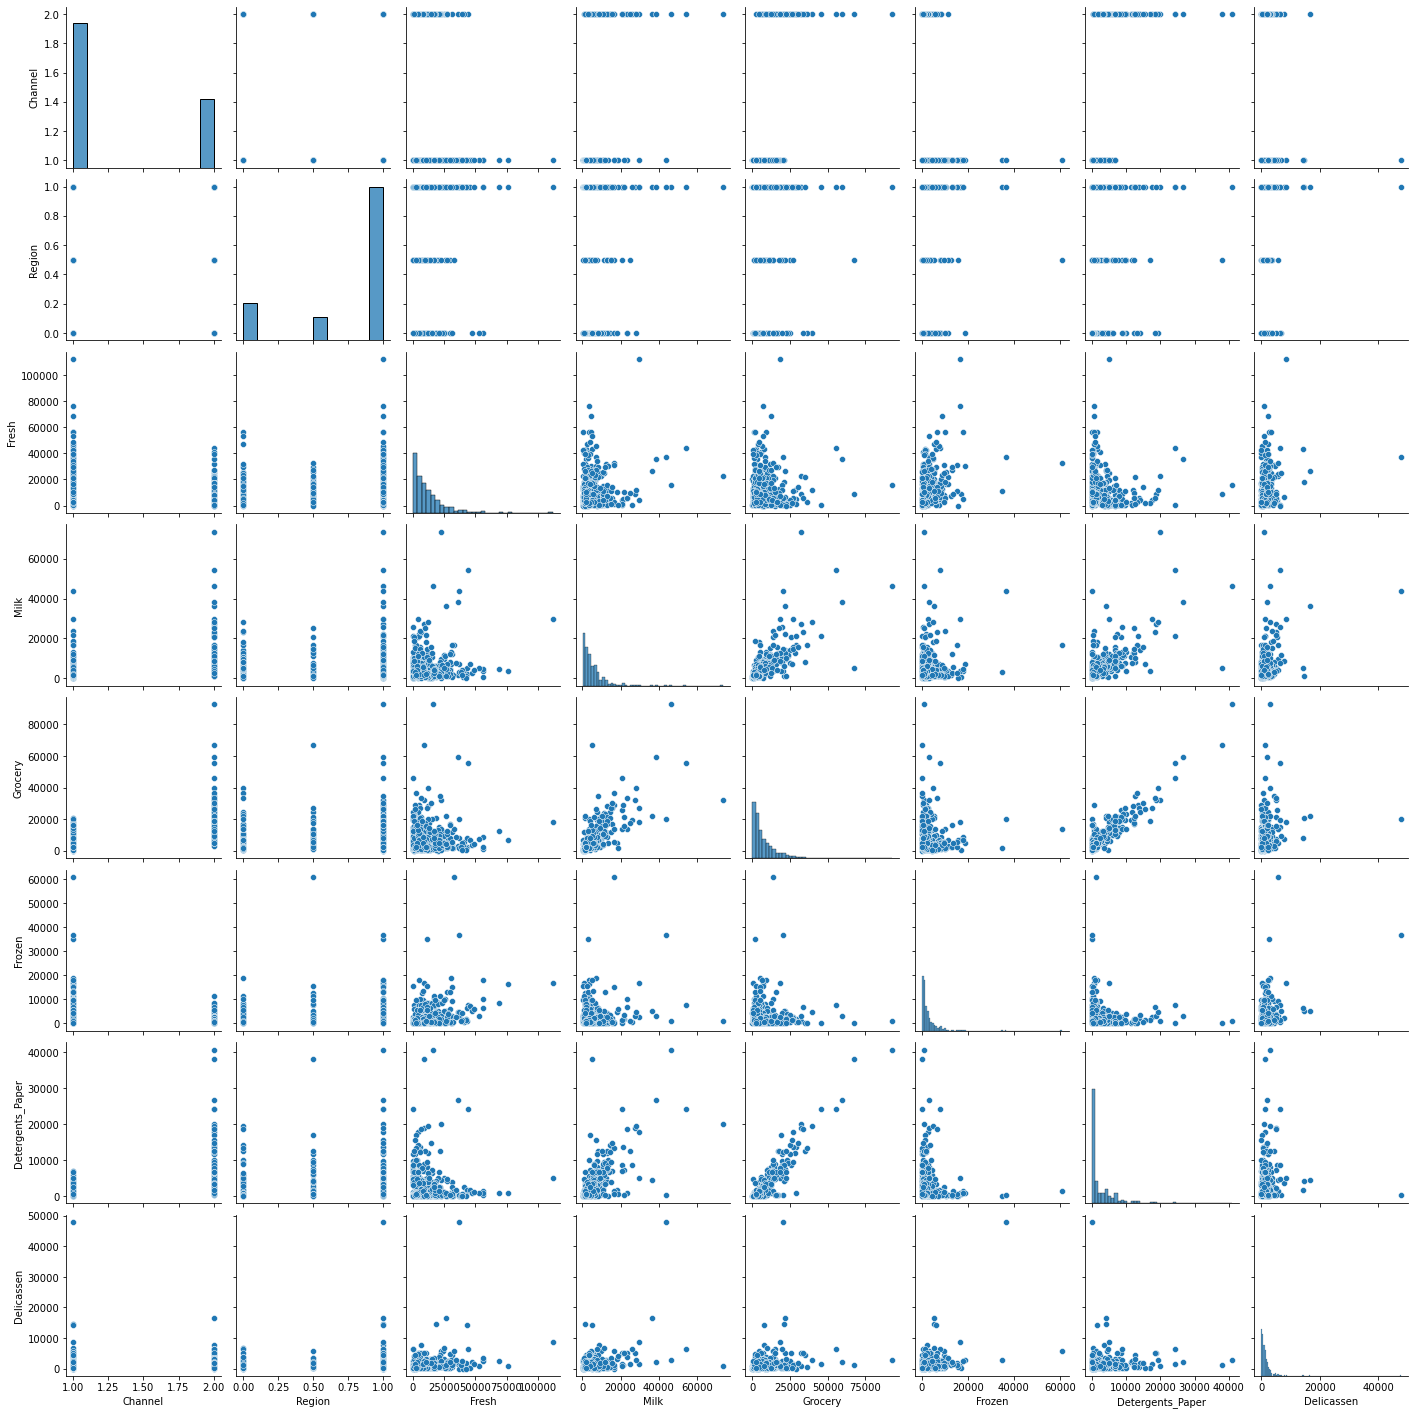

In [38]:
sns.pairplot(data)  #relationship between two varaibles or to form the most separated clusters.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Region'>

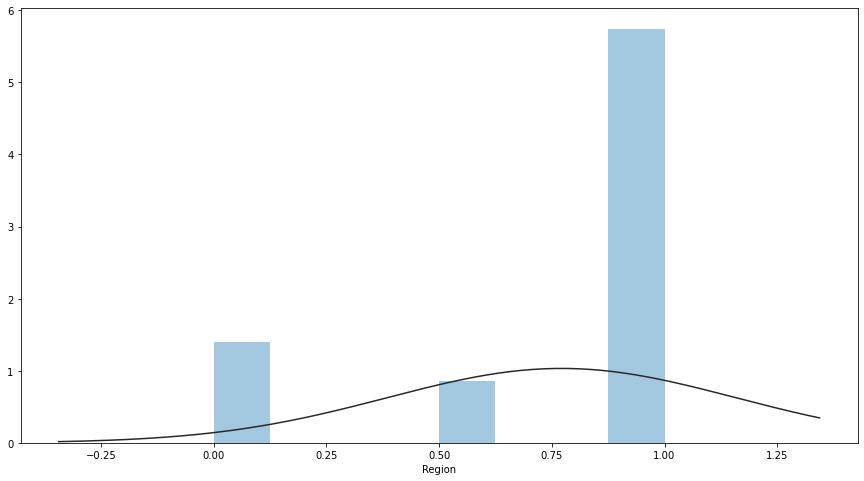

In [39]:
plt.figure(figsize = (15,8))
sns.distplot(data["Region"],fit=norm, kde = False)  # displot ,depicts variation in the data distribution


In [40]:
data.isnull().sum()  # null values of all features

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# K-Mean clustering
#### Compute the centroids and itrerates until we it finds optimal centroid.
#### it is iterative algorithms that divides the unlabeled datasets into K different clusters in such a way that each dataset belongs only one group that has similar properties.

In [41]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000056,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000063,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000062,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000065,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000040,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [42]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [43]:
kmeans.inertia_  #sum of squared distance of samples to their closets cluster center.

45.9505856264521

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia')

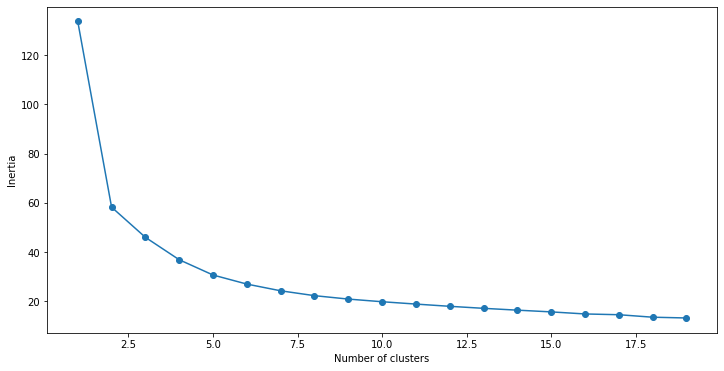

In [44]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [45]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [46]:
pred=kmeans.predict(data_scaled)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0,

In [47]:
data["pred"]=pred
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,pred
0,2,1.0,12669,9656,7561,214,2674,1338,0
1,2,1.0,7057,9810,9568,1762,3293,1776,1
2,2,1.0,6353,8808,7684,2405,3516,7844,1
3,1,1.0,13265,1196,4221,6404,507,1788,0
4,2,1.0,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,1.0,29703,12051,16027,13135,182,2204,0
436,1,1.0,39228,1431,764,4510,93,2346,0
437,2,1.0,14531,15488,30243,437,14841,1867,1
438,1,1.0,10290,1981,2232,1038,168,2125,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


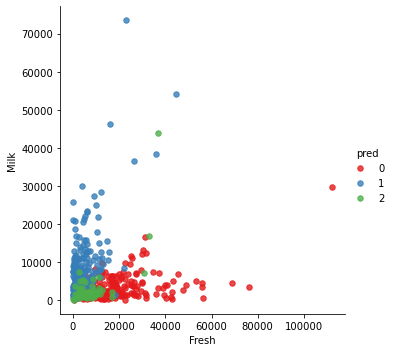

In [48]:
import seaborn as sns
sns.lmplot('Fresh','Milk',data=data, hue='pred',palette='Set1', fit_reg=False ,scatter_kws={"s":30})

# Agglomerative Clustering
#### group obejects in clusters based on their similarity
#### in agglomerative clustering each data point is treated as a single cluster and then successively merge or agglomerate (bottom-up approach) the pairs of clusters. The hierarchy of the clusters is represented as a dendrogram or tree structure.

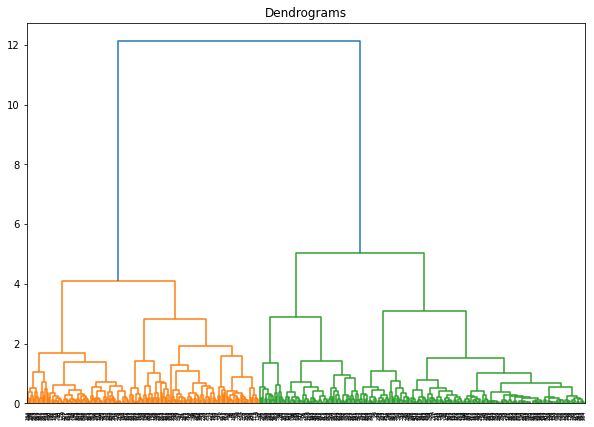

In [49]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

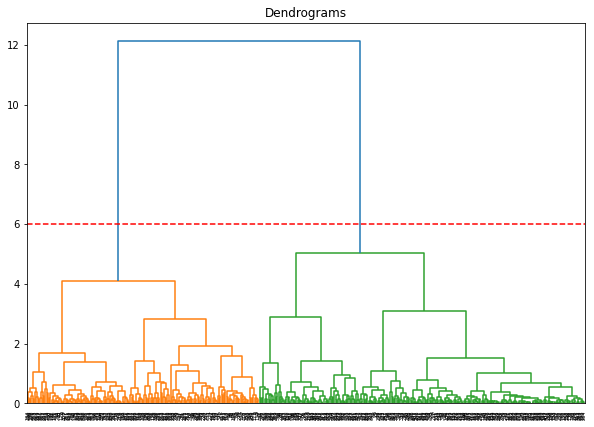

In [50]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [51]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

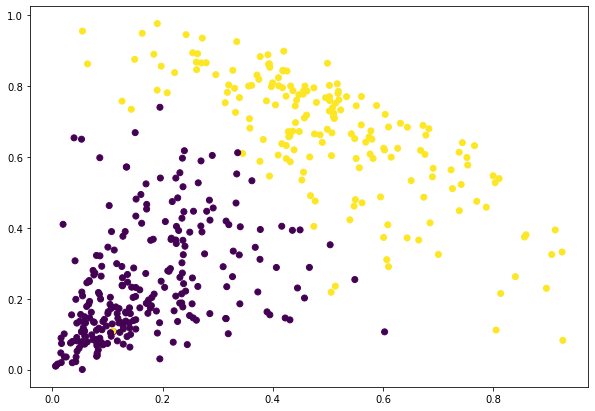

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

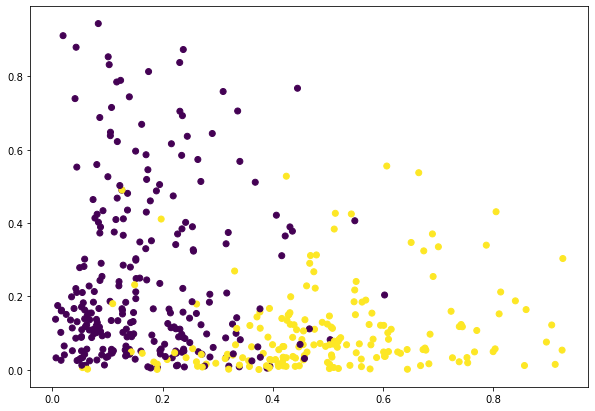

In [53]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Frozen'], c=cluster.labels_)

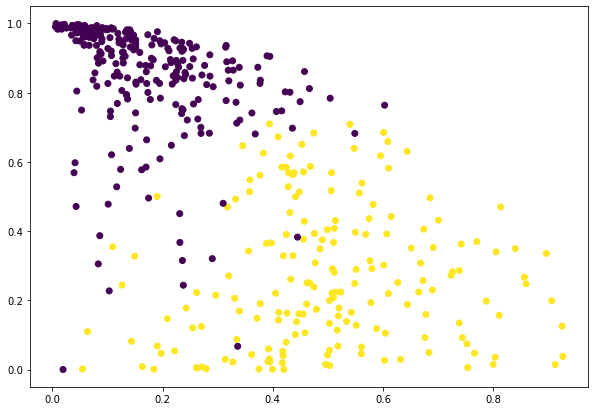

In [54]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Fresh'], c=cluster.labels_) 

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=3.3, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

### So the whole analysis of Wholesale Customers data  we find out the they have a small realation between the all feature vectors and when we applied
### the K-mean and Agglomerative clustering only 2 clusters are made because the differnces between the centroid of dataset is very small and we made 3 clusters they overlap each other. 
